# Zomato Data Analysis Project

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Data Folder/Zomato data .csv')
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


In [ ]:
def handleRate(value):
  value=str(value).split('/')
  value=value[0]
  return float(value)

df['rate']=df['rate'].apply(handleRate)
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


In [ ]:
df.isnull().sum().sum()

0

### Types of Restaurant

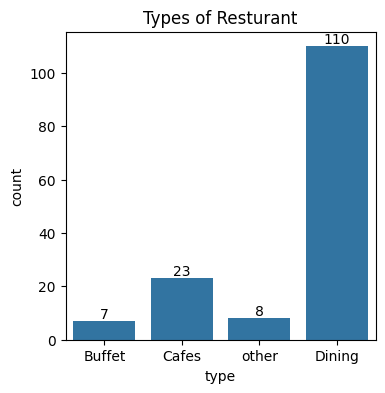

In [ ]:
plt.figure(figsize=(4,4))
ax=sns.countplot(x='listed_in(type)',data=df)
ax.bar_label(ax.containers[0])
plt.title('Types of Restaurant')
plt.xlabel('type')
plt.show()

### Conclusion - majority of the restaurant falls in dining category

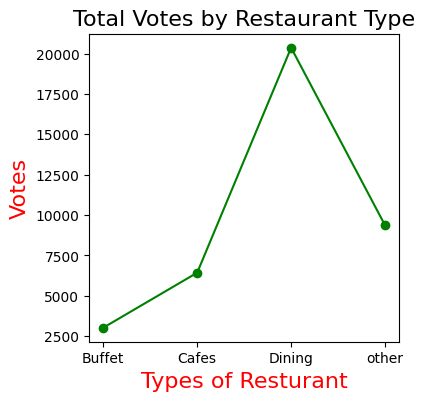

In [ ]:
plt.figure(figsize=(4,4))
gb=df.groupby('listed_in(type)')['votes'].sum()
result=pd.DataFrame({'votes':gb})
plt.plot(result,c='green',marker='o')
plt.xlabel('Types of Restaurant',c='red',size=16)
plt.ylabel('Votes',c='red',size=16)
plt.title('Total Votes by Restaurant Type',size=16)
plt.show()

### Conclusion - Dining restaurants have received the maximum votes

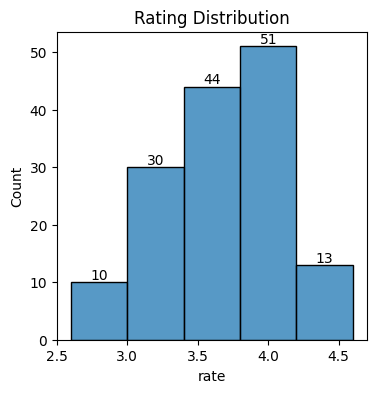

In [ ]:
plt.figure(figsize=(4,4))
ax=sns.histplot(x='rate',data=df,bins=5)
ax.bar_label(ax.containers[0])
plt.title('Rating Distribution')
plt.show()

### Conclusion: The majority of restaurants have received ratings from 3.5 to 4

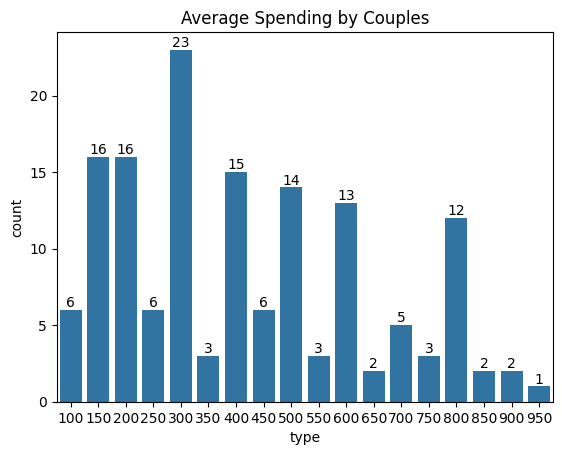

In [ ]:
ax=sns.countplot(x='approx_cost(for two people)',data=df)
ax.bar_label(ax.containers[0])
plt.title('Average Spending by Couples')
plt.xlabel('type')
plt.show()

### Conclusion - The majority of couples prefer restaurants with an approximate cost of 300 rupees

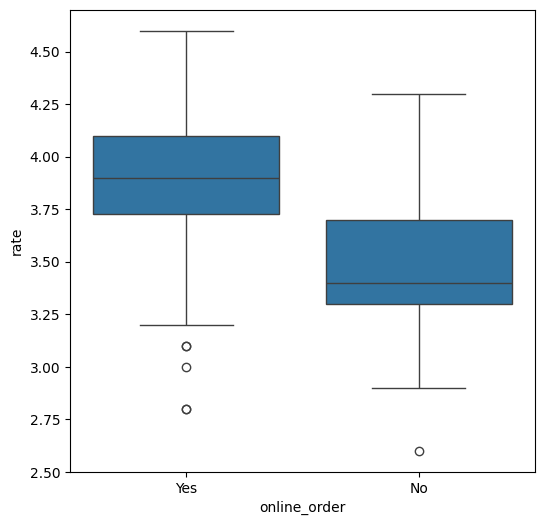

In [ ]:
plt.figure(figsize=(6,6))
sns.boxplot(x='online_order',y='rate',data=df)
plt.show()

### Conclusion - Offline orders were found to receive lower ratings compared to online orders.

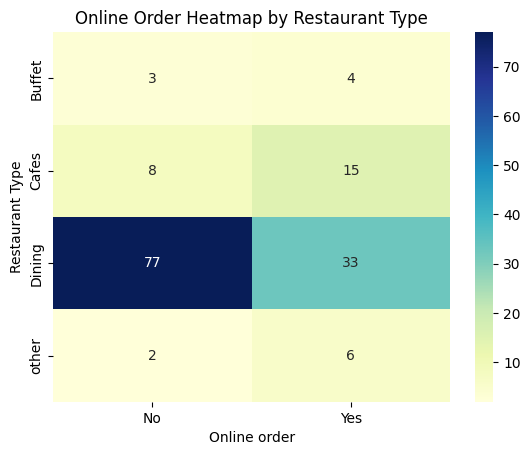

In [71]:
pivot_table=df.pivot_table(index='listed_in(type)',columns='online_order',aggfunc='size',fill_value=0)
sns.heatmap(pivot_table,annot=True, cmap='YlGnBu',fmt='d')
plt.title('Online Order Heatmap by Restaurant Type')
plt.xlabel("Online order")
plt.ylabel("Restaurant Type")
plt.show()

### Conclusion: Dining restaurants primarily accept offline orders, whereas cafes primarily receive online orders. This suggests that clients prefer to order in person at restaurants, but prefer online ordering at cafes.